In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = (18,10)
plt.rcParams.update({'font.size': 18})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Train, Test and Split**

## **Training Data Set**

**The training data set is a subset of the whole data set which is used to train a model. When training a model, do not train on both the testing and training data sets. This will cause the model to become overfit on the sample data.**

## **Testing Data Set**

**The testing data set is the subset of the data used to evaluate a trained model. In order to properly evaluate a model the testing data set needs to share similar characteristics to the training data set; for example if the data is normally distributed for the training data the testing subset should also be normally distributed. The test data set needs to be large enough where the results are statistically significant.**

## **Split**

**In an ideal scenario, a machine learning algorithm is trained on as much data as possible. However the model also needs to be tested on data points that have not been used to train it. By default many packages split the training data set to 80%/70% of the given data and 20%/30% for the testing data set. Many researchers have studied different approaches to splitting data based on the size of the data set or the number parameters within a model.**

**Often times data can be split randomly to create a representative sample of the original set. However if data contains clusters or autocorrelation, this needs to be factored into the split.**

**When splitting data, it is best practice to recreate the exact split between the training and testing data sets. The split can be reproduced by seeding a random split.**

<sup><sup/>
Source: [Training and Test Sets: Splitting Data](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data) from Google's Machine Learning Crash Course

<sup><sup/>
Source: [Data Split](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/example) from Google's Data Preparation and Feature Engineering for Machine Learning Course

# **GPU Data Set**

**We have three variables within our data set: $x_1$ the Ethereum to USD conversion rate, $x_2$ the price of a higher end GPU, $y$ the price of the GPU model of interest.**

**$x_1$ is the Ethereum to USD conversion rate, which is our first explanatory variable. Ethereum is mined using GPUs. A rise in the value of Ethereum will most likely create stronger demand for GPUs to mind the cryptocurrency.**

**$x_2$ is the price of a higher end GPU relative to our GPU of interest,  which is our second explanatory variable. The specific model is the GeForce RTX 2080 Super Founders Edition GPU. As the cost of GPUs rise for high end models, potential buyers may buy lower end models pushing up the price of our GPU.**

**$y$ or the price of MSI Gaming GeForce RTX 2060 Super 8GB GPU model we are interested in, this is our response variable.**

In [4]:
gpu_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/TUDev + YouTube Vids/YouTube Vids/Machine Learning/Machine Learning with Python! Multiple Linear Regression/gpu_data.xlsx',index_col='Date')
gpu_df.head()

,MSI Gaming GeForce RTX 2060 Super 8GB,Ethereum to USD,GeForce RTX 2080 Super Founders Edition
Date,,,
2019-12-30,524.83,132.633484,764.45
2019-12-31,524.83,129.610855,765.12
2020-01-01,493.45,130.802002,765.12
2020-01-02,496.16,127.410179,766.06
2020-01-03,497.10,134.171707,766.27


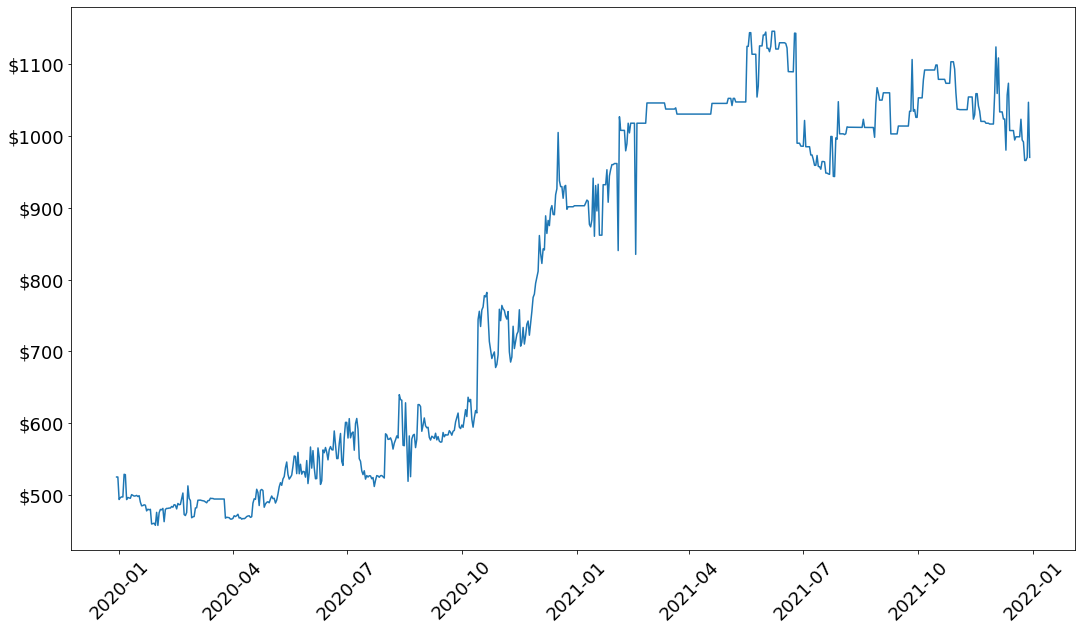

In [5]:
plt.plot(gpu_df.index,gpu_df['MSI Gaming GeForce RTX 2060 Super 8GB'])
plt.xticks(rotation = 45)
cost_label = ['$'+str(x) for x in range(500,1200,100)]
plt.yticks(range(500,1200,100),cost_label);

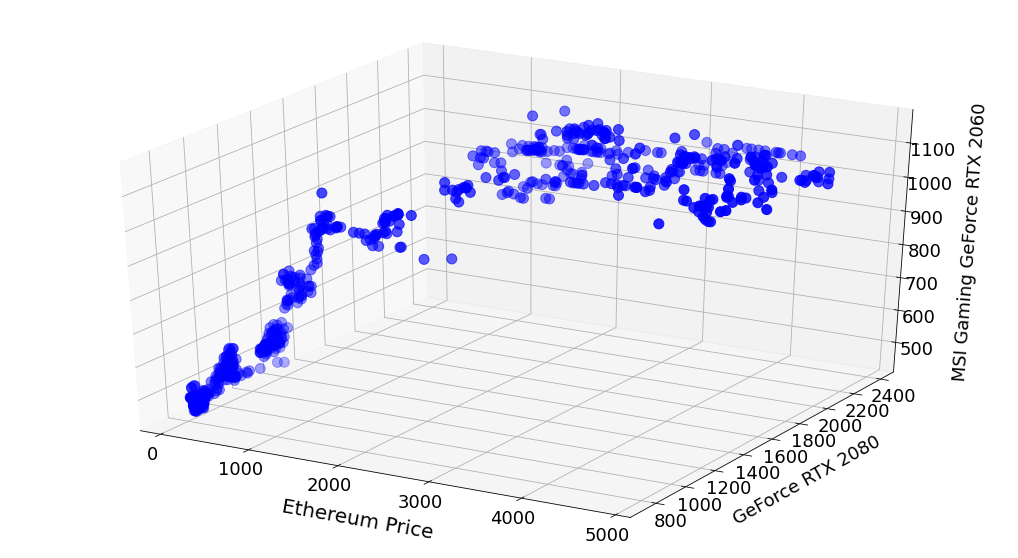

In [6]:
ax = plt.axes(projection='3d')
ax.scatter3D(gpu_df['Ethereum to USD'], 
             gpu_df['GeForce RTX 2080 Super Founders Edition'],
             gpu_df['MSI Gaming GeForce RTX 2060 Super 8GB'],
             c='blue',s=100)

ax.set_xlabel('\n\nEthereum Price', fontsize=20, rotation=150)
ax.set_ylabel('\n\nGeForce RTX 2080')
ax.set_zlabel('\n\nMSI Gaming GeForce RTX 2060');

# **Creating a Train, Test, Split Function from Scratch**

In [7]:
X = gpu_df[['GeForce RTX 2080 Super Founders Edition', 'Ethereum to USD']]
y = gpu_df['MSI Gaming GeForce RTX 2060 Super 8GB']

In [8]:
def tts(x_values, y_values, test_size = .25, seed = 0):

  try:
    if isinstance(x_values, (pd.DataFrame,pd.Series)) and isinstance(y_values,(pd.DataFrame,pd.Series)) == True:
      random_df = pd.concat([x_values,y_values], axis = 1).sample(frac = 1, random_state=seed)
      slice_val = int(len(random_df) * test_size)
      test_df, train_df = random_df[:slice_val], random_df[slice_val:]
    elif isinstance(x_values, (list, np.ndarray)) and isinstance(y_values, (list, np.ndarray)) == True:
      random_df = pd.concat([pd.DataFrame(x_values), pd.DataFrame(y_values)],axis=1).sample(frac=1,random_state=seed)
      slice_val = int(len(random_df) * test_size)
      test_df,train_df = random_df[:slice_val], random_df[slice_val:]

    return[train_df.iloc[:,:-1],train_df.iloc[:,-1:],test_df.iloc[:,:-1],test_df.iloc[:,-1:]]
    
  except:
    print('Convert your X and y values into the same data type')

In [9]:
tts(X,y,seed=5)[0]

,GeForce RTX 2080 Super Founders Edition,Ethereum to USD
Date,,
2021-03-21,2050.60,1788.217041
2021-09-16,2176.06,3571.294922
2021-02-18,1719.63,1937.449219
2021-04-04,2160.60,2093.122803
2020-09-30,1152.91,359.937866
...,...,...
2020-03-12,765.79,112.347122
2021-02-02,1402.35,1515.193726
2020-04-26,803.39,197.317535


In [10]:
tts(X.values,y.values,seed=5)[0]

,0,1
447,2050.60,1788.217041
626,2176.06,3571.294922
416,1719.63,1937.449219
461,2160.60,2093.122803
275,1152.91,359.937866
...,...,...
73,765.79,112.347122
400,1402.35,1515.193726
118,803.39,197.317535
701,1838.29,4631.479004


In [11]:
tts(X.values.tolist(),y.values.tolist(),seed=5)[0]

,0,1
447,2050.60,1788.217041
626,2176.06,3571.294922
416,1719.63,1937.449219
461,2160.60,2093.122803
275,1152.91,359.937866
...,...,...
73,765.79,112.347122
400,1402.35,1515.193726
118,803.39,197.317535
701,1838.29,4631.479004


In [12]:
tts(X,y.values)

Convert your X and y values into the same data type


## **Testing our Train, Test, Split function against scikit learn's**

In [13]:
%%timeit
tts(X,y)

1000 loops, best of 5: 1.75 ms per loop


In [14]:
%%timeit
train_test_split(X, y, test_size=0.25, random_state=5)

The slowest run took 9.64 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 961 µs per loop


# **Model - Random Forest**

**Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For regression tasks, the mean or average prediction of the individual trees is returned.**

<sup><sup/>
Source: [Random Forest](https://en.wikipedia.org/wiki/Random_forest#cite_note-ho1995-1) from Wikipedia.org

# **Overfitting a model**

**Overfitting occurs when a model fits closely to the data it was trained on and performs poorly on generalized data outside of the training set. A model that is overfit has high variance. High variance may result from an algorithm modeling the random noise in the training data**

<sup><sup/>
Source: [Overfitting](https://www.ibm.com/cloud/learn/overfitting) from IBM Cloud Learn Hub

<sup><sup/>
Source: [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) from Wikipedia.org

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

regressor = RandomForestRegressor(random_state=0)
regressor.fit(X_train, y_train)
rf_pred = regressor.predict(X_test)

regressor_overfit = RandomForestRegressor(random_state=0)
regressor_overfit.fit(X, y)
rf_pred_overfit = regressor_overfit.predict(X)

## **Mean Squared Error**

**Mean squared error (MSE) is the sum of squared differences
between the predicted and true values. As the error rate increases, the MSE penalty grows quadratically, which heavily penalizes a model. A downside to MSE is if applied to a data set with a few outliers, it can heavily penalize a model.**

**MSE is one of the most popular tools to measure how accurate models are within statistics and machine learning.**

**Within Machine Learning, MSE is used as a loss function or part of a loss function that an algorithm minimizes.**

### $MSE = \displaystyle \frac{1}{N} \sum_{i=0}^N (y_i - \hat{y_i})^2 = \displaystyle \frac{1}{N} \sum_{i=0}^N (error_i)^2$

### $\text{Where: $N$=number of observed values, $y_i$ = observed target value, $\hat{y}=$ predicted}$

### $\text{target value.}$

<sup>Source: [Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido</sup>

In [16]:
def mse(actual_y, predicted_y):
  return sum([(y_s - y_pred)**2 for y_s,y_pred in zip(actual_y, predicted_y)])*(1/len(actual_y))

In [17]:
mse(y_test, rf_pred)

782.8963895884156

In [18]:
mse(y, rf_pred_overfit)

110.25978347389753

In [19]:
rf_df = pd.DataFrame({'Random Forest Prediction': rf_pred,
              'Date': y_test.index}).set_index('Date')

overfit_df = pd.DataFrame({'Random Forest Regression Overfit':rf_pred_overfit}).set_index(y.index)
overfit_df_filtered = overfit_df[overfit_df.index.isin(rf_df.index)]

merged_df = pd.concat([y_test,rf_df,overfit_df_filtered], axis = 1)
merged_df.rename(columns = {'MSI Gaming GeForce RTX 2060 Super 8GB': 'Actual GPU Price'}, inplace = True)

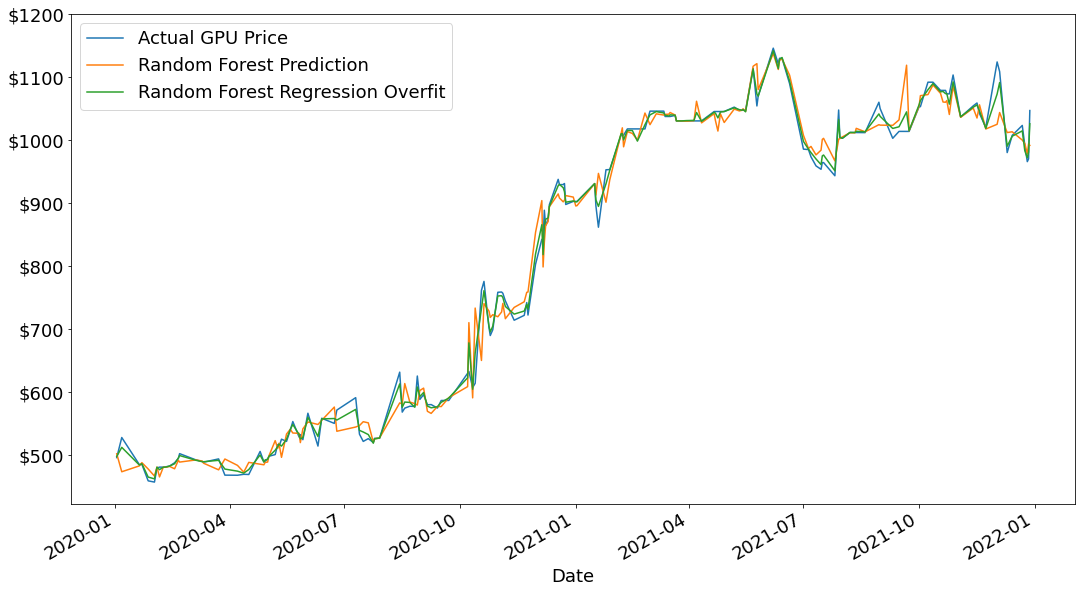

In [20]:
merged_df.plot()
cost_label = ['$'+str(x) for x in range(500,1300,100)]
plt.yticks(range(500,1300,100),cost_label);

# **Underfitting a model**

**Underfitting occurs when a model poorly performs on both training data and generalized data. Underfitting can occur if the training set is too small. Underfitted models experience high bias, this can cause a model to miss the relevant relations between features and target outputs.**

<sup><sup/>
Source: [Overfitting](https://www.ibm.com/cloud/learn/overfitting) from IBM Cloud Learn Hub

<sup><sup/>
Source: [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) from Wikipedia.org

In [21]:
small_dataset = gpu_df.sample(frac= .025, random_state=0)
X_small = small_dataset[['GeForce RTX 2080 Super Founders Edition', 'Ethereum to USD']]
y_small = small_dataset['MSI Gaming GeForce RTX 2060 Super 8GB']

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.25, random_state=5)

In [22]:
regressor_underfit = RandomForestRegressor(random_state=10)
regressor_underfit.fit(X_train_small, y_train_small)
rf_pred_underfit = regressor_underfit.predict(X_test_small)

In [23]:
mse(y_test_small, rf_pred_underfit)

5281.617228278037

In [24]:
rf_underfit = pd.DataFrame({'Actual GPU Price': y_test_small,
              'Random Forest Regression Underfit': rf_pred_underfit})

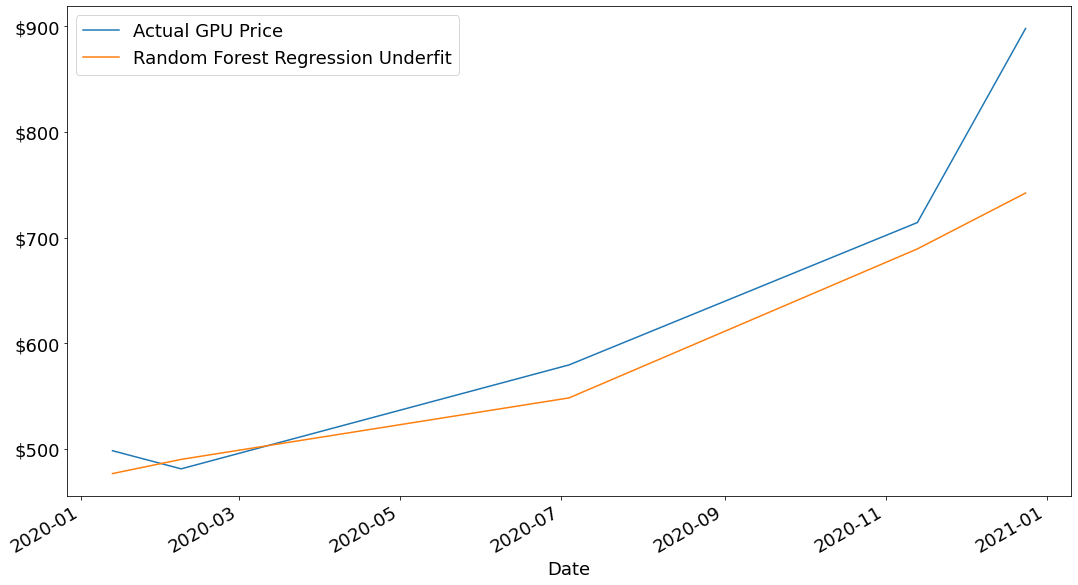

In [25]:
rf_underfit.plot()
cost_label = ['$'+str(x) for x in range(500,1000,100)]
plt.yticks(range(500,1000,100),cost_label);

# **Allocating the Optimal Proportion to the Training and Testing Data Sets**

In [26]:
train_error_list = []
test_error_nested_list = []

for i in np.arange(.1,1,.01):
  x = gpu_df[['GeForce RTX 2080 Super Founders Edition', 'Ethereum to USD']]
  Y = gpu_df['MSI Gaming GeForce RTX 2060 Super 8GB']

  x_train, x_test, Y_train, Y_test = train_test_split(x, Y, train_size=i, random_state=52)
  regr = RandomForestRegressor(random_state=2)
  regr.fit(x_train, Y_train)
  regr_pred_test = regr.predict(x_test)
  test_error_nested_list.append([mse(Y_test, regr_pred_test),i])
  regr_pred_train = regr.predict(x_train)
  train_error_list.append(mse(Y_train, regr_pred_train))

In [27]:
min_idx = [error[0] for error in test_error_nested_list].index(min([error[0] for error in test_error_nested_list]))
min_test_proportion = test_error_nested_list[min_idx][1]

min_test_error_range = [min_test_proportion-.05,min_test_proportion+.05]
test_error_list = [error[0] for error in test_error_nested_list]

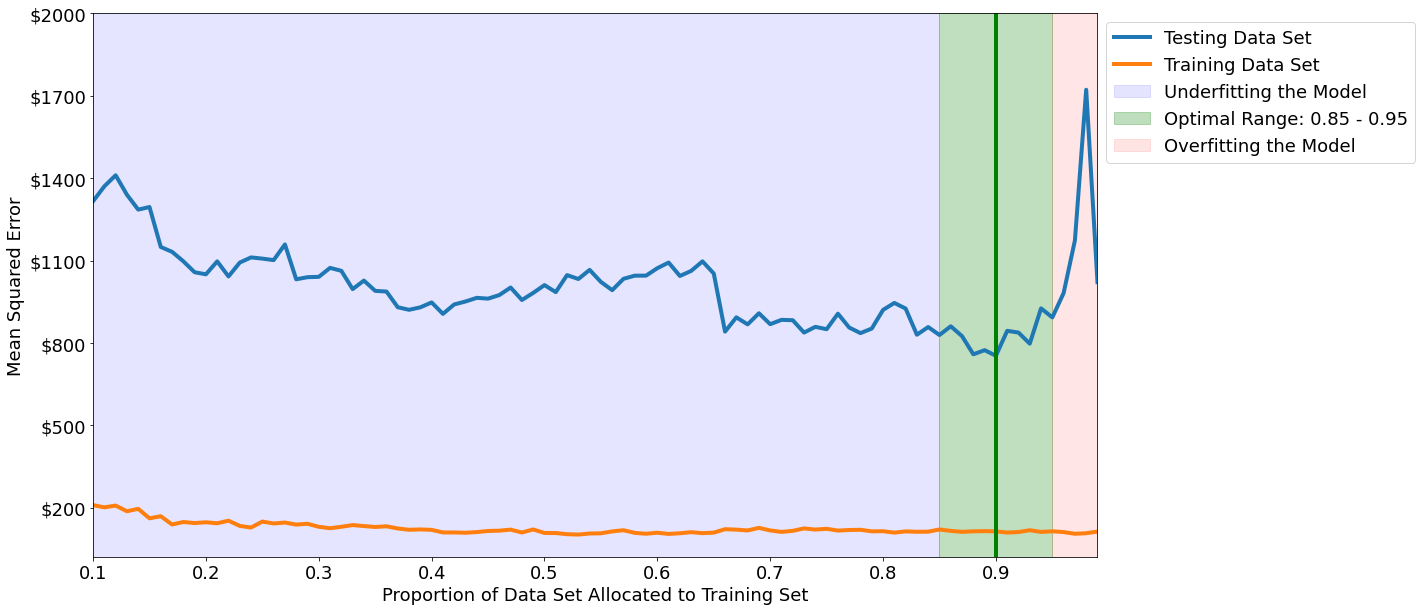

In [28]:
plt.plot(np.arange(.10,1,.01), test_error_list, label = 'Testing Data Set', lw = 4)
plt.plot(np.arange(.10,1,.01), train_error_list, label = 'Training Data Set', lw = 4)
plt.axvline(x = min_test_proportion, color = 'green', lw = 4)
plt.axvspan(.1, min_test_error_range[0], alpha=.1, color='blue', label = 'Underfitting the Model')
plt.axvspan(min_test_error_range[0], min_test_error_range[1], alpha=.25, color='green', label = f'Optimal Range: {min_test_error_range[0]:.2f} - {min_test_error_range[1]:.2f}')
plt.axvspan(min_test_error_range[1], .99, alpha=.1, color='red', label = 'Overfitting the Model')
plt.xlabel('Proportion of Data Set Allocated to Training Set')
plt.ylabel('Mean Squared Error')
cost_label = ['$'+str(x) for x in range(200,2300,300)]
plt.yticks(range(200,2300,300),cost_label)
plt.legend(bbox_to_anchor = (1,1))
plt.margins(x=0);

# **References and Additional Learning**

## **Data**

- **[Ethereum to USD](https://finance.yahoo.com/quote/ETH-USD/) from Yahoo! Finance**

- **[Price Histroy for GeForce RTX 2080 Super Founders Edition](https://pangoly.com/en/price-history/nvidia-geforce-rtx-2080-super-founders-edition) from pangoly**

- **[MSI Gaming GeForce RTX 2060 Super 8GB](https://pangoly.com/en/price-history/msi-gaming-geforce-rtx-2060-super-8gb) from pangoly**

## **Textbook**
- **[Introduction to Machine Learning with Python](https://www.oreilly.com/library/view/introduction-to-machine/9781449369880/) by Andreas C. Müller and Sarah Guido**

## **Websites**

- **[Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) from Wikipedia.org**

- **[Data Split](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/example) from Google's Data Preparation and Feature Engineering for Machine Learning Course**

- **[Overfitting](https://www.ibm.com/cloud/learn/overfitting) from IBM Cloud Learn Hub**

- **[Random Forest](https://en.wikipedia.org/wiki/Random_forest#cite_note-ho1995-1) from Wikipedia.org**

- **[Splitting data randomly can ruin your model](https://datascience.stanford.edu/news/splitting-data-randomly-can-ruin-your-model) from Stanford.edu by Krishna Rao**

- **[Splitting into train, dev and test sets](https://cs230.stanford.edu/blog/split/) from Stanford.edu by Andrew Ng and Kian Katanforoosh**

- **[Training and Test Sets: Splitting Data](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data) from Google's Machine Learning Crash Course**
